<a href="https://colab.research.google.com/github/SRIDHARCCC/Python/blob/master/Copy_of_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
%pip install -q dagshub mlflow

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
path = '/content/drive/MyDrive/Colab Notebooks/VIRTULINTERNSHIP/project_resources1/'

In [134]:
survey_data = pd.read_csv(path + 'survey_results.csv')
survey_data.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [135]:
survey_data.shape

(30010, 17)

In [136]:
survey_data.isnull().sum() # finding null values

,0
respondent_id,0
age,0
gender,0
zone,0
occupation,0
income_levels,8064
consume_frequency(weekly),8
current_brand,0
preferable_consumption_size,0
awareness_of_other_brands,0


In [137]:
survey_data[survey_data.duplicated()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [138]:
survey_data.duplicated().sum()

np.int64(10)

In [139]:
#Removing duplicates
survey_data.drop_duplicates(inplace=True)

In [140]:
print(f"Max_age_value = {survey_data['age'].max()}")

print(f"Min_age_value = {survey_data['age'].min()}")


Max_age_value = 604
Min_age_value = 18


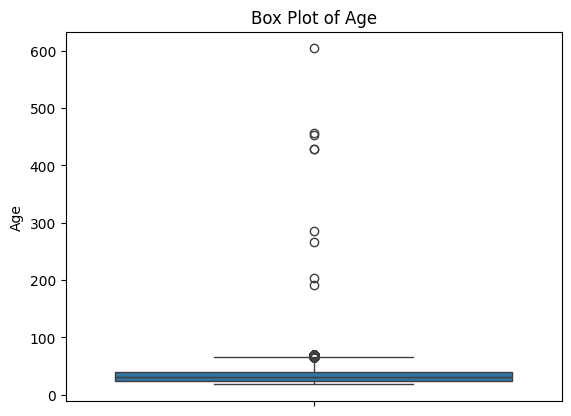

In [141]:
sns.boxplot(y=survey_data['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

In [142]:
survey_data[(survey_data['age'] >100)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


In [143]:
# Removing age outliers, agegreater than 100
survey_data = survey_data[survey_data['age'] <= 100]

In [144]:
print(survey_data[(survey_data['age'] >100)].shape)

(0, 17)


In [145]:
survey_data.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250


In [146]:
survey_data.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', nan, '10L - 15L', '26L - 35L'],
      dtype=object)

In [147]:
survey_data[survey_data['occupation']=='Student'].income_levels.unique()

array([nan], dtype=object)

In [148]:
mode_income_by_occupation = survey_data.groupby('occupation')['income_levels'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
print(mode_income_by_occupation)

occupation
Entrepreneur            16L - 25L
Retired                      <10L
Student                      None
Working Professional    16L - 25L
Name: income_levels, dtype: object


So we understood the income levels of students are not reported. But for other professions income_levels there is no Null values

In [149]:
survey_data.loc[survey_data['occupation'] == 'Student', 'income_levels'] = survey_data.loc[survey_data['occupation'] == 'Student', 'income_levels'].fillna('Not Reported')
print(survey_data[survey_data['occupation'] == 'Student']['income_levels'].unique())

['Not Reported']


In [150]:
survey_data[survey_data['consume_frequency(weekly)'].isnull()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
879,R00880,48,F,Urban,Entrepreneur,26L - 35L,NaN,Newcomer,Medium (500 ml),above 4,Quality,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Casual (eg. At home),200-250
4174,R04173,23,M,Urban,Student,Not Reported,NaN,Newcomer,Medium (500 ml),above 4,Price,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
9550,R09546,19,M,Urban,Student,Not Reported,NaN,Established,Medium (500 ml),0 to 1,Price,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),50-100
15352,R15347,25,M,Metro,Student,Not Reported,NaN,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),100-150
19719,R19713,27,M,Urban,Working Professional,16L - 25L,NaN,Newcomer,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
26143,R26134,19,M,Metro,Student,Not Reported,NaN,Newcomer,Medium (500 ml),2 to 4,Price,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
26859,R26850,25,M,Metro,Working Professional,16L - 25L,NaN,Established,Medium (500 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),200-250
27163,R27154,21,M,Metro,Student,Not Reported,NaN,Established,Small (250 ml),2 to 4,Price,Traditional,Retail Store,Simple,Low (Not very concerned),Casual (eg. At home),50-100


In [151]:
mode_consume_frequency = survey_data['consume_frequency(weekly)'].mode()[0]
survey_data['consume_frequency(weekly)'].fillna(mode_consume_frequency, inplace=True)
print(survey_data['consume_frequency(weekly)'].isnull().sum())
survey_data.head()

0


/tmp/ipython-input-2340326966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_data['consume_frequency(weekly)'].fillna(mode_consume_frequency, inplace=True)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [152]:
survey_data['consume_frequency(weekly)'].value_counts()

,count
consume_frequency(weekly),
3-4 times,11794
5-7 times,9774
0-2 times,8423


In [153]:
survey_data[survey_data['purchase_channel'].isnull()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
653,R00654,35,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,NaN,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
1865,R01866,21,M,Urban,Student,Not Reported,0-2 times,Newcomer,Medium (500 ml),0 to 1,Availability,Traditional,NaN,Simple,Low (Not very concerned),Social (eg. Parties),50-100
4280,R04279,39,M,Metro,Entrepreneur,26L - 35L,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,NaN,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),200-250
14657,R14652,30,F,Urban,Working Professional,<10L,0-2 times,Newcomer,Medium (500 ml),2 to 4,Price,Exotic,NaN,Premium,High (Very health-conscious),Casual (eg. At home),150-200
15423,R15418,39,M,Rural,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,NaN,Premium,Medium (Moderately health-conscious),Casual (eg. At home),150-200
17207,R17202,41,M,Urban,Entrepreneur,16L - 25L,5-7 times,Newcomer,Large (1 L),2 to 4,Brand Reputation,Traditional,NaN,Eco-Friendly,High (Very health-conscious),Social (eg. Parties),200-250
20527,R20521,22,F,Metro,Student,Not Reported,3-4 times,Newcomer,Large (1 L),0 to 1,Price,Exotic,NaN,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
23741,R23733,26,M,Urban,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Quality,Traditional,NaN,Eco-Friendly,High (Very health-conscious),Social (eg. Parties),200-250
24551,R24543,48,F,Metro,Entrepreneur,> 35L,3-4 times,Newcomer,Large (1 L),0 to 1,Brand Reputation,Exotic,NaN,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),200-250
28559,R28550,35,M,Urban,Student,Not Reported,0-2 times,Newcomer,Medium (500 ml),0 to 1,Price,Exotic,NaN,Simple,Low (Not very concerned),Casual (eg. At home),50-100


In [154]:
survey_data['purchase_channel'].value_counts()

,count
purchase_channel,
Online,16562
Retail Store,13419


In [155]:
channel_distribution = survey_data['purchase_channel'].value_counts(normalize=True)
missing_indices = survey_data['purchase_channel'].isnull()
num_missing = missing_indices.sum()

if num_missing > 0:
    # Randomly sample from the existing distribution for missing values
    random_fill_values = np.random.choice(
        channel_distribution.index,
        size=num_missing,
        p=channel_distribution.values
    )
    survey_data.loc[missing_indices, 'purchase_channel'] = random_fill_values
    print(f"Filled {num_missing} NA values in 'purchase_channel' randomly.")
else:
    print("No NA values found in 'purchase_channel'.")

print("Updated 'purchase_channel' value counts:")
print(survey_data['purchase_channel'].value_counts())
print("Number of remaining NA values:", survey_data['purchase_channel'].isnull().sum())

Filled 10 NA values in 'purchase_channel' randomly.
Updated 'purchase_channel' value counts:
purchase_channel
Online          16567
Retail Store    13424
Name: count, dtype: int64
Number of remaining NA values: 0


In [156]:
survey_data.isnull().sum()

,0
respondent_id,0
age,0
gender,0
zone,0
occupation,0
income_levels,0
consume_frequency(weekly),0
current_brand,0
preferable_consumption_size,0
awareness_of_other_brands,0


In [157]:
survey_data.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250


In [158]:
survey_data['zone'].value_counts()

,count
zone,
Metro,11906
Urban,10686
Semi-Urban,5274
Rural,2116
urbna,5
Metor,4


In [159]:
survey_data['zone'] = survey_data['zone'].replace({'urbna': 'Urban', 'Metor': 'Metro'})
survey_data['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [160]:
survey_data['current_brand'].value_counts()

,count
current_brand,
Established,15442
Newcomer,14499
newcomer,30
Establishd,20


In [161]:
survey_data['current_brand'] = survey_data['current_brand'].replace({'newcomer': 'Newcomer', 'Establishd': 'Established'})
survey_data['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

In [162]:
survey_data.head(5)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [164]:
survey_data.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [163]:
import pandas as pd
import numpy as np

def preprocess_customer_data(df):
    """
    Consolidates age binning, frequency/awareness mapping, and socio-economic
    scoring into a single pipeline.
    """
    # 1. Create a copy to prevent SettingWithCopyWarning
    df = df.copy()

    # 2. Bin Age Groups
    age_bins = [18, 25, 35, 45, 55, 70, np.inf]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '56-70', '70+']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

    # 3. Define Mappings
    mappings = {
        'consume_frequency(weekly)': {
            '0-2 times': 1, '3-4 times': 2, '5-7 times': 3
        },
        'awareness_of_other_brands': {
            '0 to 1': 1, '2 to 4': 2, 'above 4': 3
        },
        'zone': {
            'Rural': 1, 'Semi-Urban': 2, 'Urban': 3, 'Metro': 4
        },
        'income_levels': {
            'Not Reported': 0, '<10L': 1, '10L - 15L': 2, '16L - 25L': 3, '26L - 35L': 4, '> 35L': 5
        }
    }

    # 4. Apply Mappings
    df['frequency_score'] = df['consume_frequency(weekly)'].map(mappings['consume_frequency(weekly)'])
    df['awarness_score'] = df['awareness_of_other_brands'].map(mappings['awareness_of_other_brands'])
    df['zone_score'] = df['zone'].map(mappings['zone'])
    df['income_score'] = df['income_levels'].map(mappings['income_levels'])

    # 5. Calculate Brand Efficiency (cf_ab_score)
    # Formula: freq / (freq + aware)
    total_brand_score = df['frequency_score'] + df['awarness_score']
    df['cf_ab_score'] = df['frequency_score'] / total_brand_score

    # 6. Calculate Socio-Economic Score (zas_score)
    # Formula: zone * income
    df['zas_score'] = df['zone_score'] * df['income_score']

    return df

In [165]:
survey_data = preprocess_customer_data(survey_data)
survey_data.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,...,health_concerns,typical_consumption_situations,price_range,age_group,frequency_score,awarness_score,zone_score,income_score,cf_ab_score,zas_score
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,...,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,2,1,3,1,0.666667,3
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,...,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,3,2,4,5,0.600000,20
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,...,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,2,2,1,5,0.500000,5
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,...,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,3,1,3,3,0.750000,9
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,...,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,2,1,4,0,0.666667,0


In [ ]:
survey_data['bsi'] = ((survey_data['current_brand'] != 'Established') &
                       (survey_data['reasons_for_choosing_brands'].isin(['Price', 'Quality']))).astype(int)

print(survey_data['bsi'].value_counts())
survey_data.head()

bsi
0    20816
1     9175
Name: count, dtype: int64


,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,...,typical_consumption_situations,price_range,age_group,frequency_score,awarness_score,cf_ab_score,zone_score,income_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,...,"Active (eg. Sports, gym)",100-150,26-35,2,1,0.666667,3,1,3,1
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,...,Social (eg. Parties),200-250,46-55,3,2,0.600000,4,5,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,...,"Active (eg. Sports, gym)",200-250,36-45,2,2,0.500000,1,5,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,...,"Active (eg. Sports, gym)",150-200,26-35,3,1,0.750000,3,3,9,0
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,...,"Active (eg. Sports, gym)",50-100,18-25,2,1,0.666667,4,0,0,0


In [ ]:
occupation_by_age_group = survey_data.groupby(['age_group']).occupation.value_counts().unstack(fill_value=0)
occupation_by_age_group


/tmp/ipython-input-3007237840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_by_age_group = survey_data.groupby(['age_group']).occupation.value_counts().unstack(fill_value=0)


occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106
70+,0,0,0,0


In [ ]:
initial_rows = len(survey_data)
survey_data = survey_data[~((survey_data['age_group'] == '56-70') & (survey_data['occupation'] == 'Student'))]
removed_rows = initial_rows - len(survey_data)
print(f"Removed {removed_rows} rows where age_group is '56-70' and occupation is 'Student'.")
print("Updated DataFrame head:")
print(survey_data.head())
print("Value counts for 'occupation' in '56-70' age group after removal:")
print(survey_data[survey_data['age_group'] == '56-70']['occupation'].value_counts())

Removed 35 rows where age_group is '56-70' and occupation is 'Student'.
Updated DataFrame head:
  respondent_id gender   zone            occupation income_levels  \
0        R00001      M  Urban  Working Professional          <10L   
1        R00002      F  Metro  Working Professional         > 35L   
2        R00003      F  Rural  Working Professional         > 35L   
3        R00004      F  Urban  Working Professional     16L - 25L   
4        R00005      M  Metro               Student  Not Reported   

  consume_frequency(weekly) current_brand preferable_consumption_size  \
0                 3-4 times      Newcomer             Medium (500 ml)   
1                 5-7 times   Established             Medium (500 ml)   
2                 3-4 times      Newcomer             Medium (500 ml)   
3                 5-7 times      Newcomer             Medium (500 ml)   
4                 3-4 times   Established             Medium (500 ml)   

  awareness_of_other_brands reasons_for_choosing_b

In [ ]:
survey_data.occupation.value_counts()


,count
occupation,
Working Professional,15801
Student,8025
Entrepreneur,5000
Retired,1130


In [ ]:
survey_data.isnull().sum()

,0
respondent_id,0
gender,0
zone,0
occupation,0
income_levels,0
consume_frequency(weekly),0
current_brand,0
preferable_consumption_size,0
awareness_of_other_brands,0
reasons_for_choosing_brands,0


In [ ]:
survey_data_1 = survey_data.drop(['respondent_id', 'price_range','income_score','zone_score','awarness_score','frequency_score'], axis=1)

In [ ]:
survey_data_1['zas_score'].value_counts()

,count
zas_score,
0,8025
12,3671
4,3082
6,2991
8,2739
3,2085
9,2041
16,1508
2,1257


In [ ]:
survey_data_1['bsi'].value_counts()

,count
bsi,
0,20796
1,9160


**MODEL DEVELLOPMENT**

In [ ]:
survey_data_1.shape

(29956, 18)

In [ ]:
X = survey_data_1

In [ ]:
display(X.head())

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.666667,3,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.600000,20,0
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.500000,5,0
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.750000,9,0
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.666667,0,0


In [ ]:
y = survey_data['price_range']

In [ ]:
print(y.head())

0    100-150
1    200-250
2    200-250
3    150-200
4     50-100
Name: price_range, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22467, 18)
X_test shape: (7489, 18)
y_train shape: (22467,)
y_test shape: (7489,)


In [ ]:
X.head(5)

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.666667,3,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.600000,20,0
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.500000,5,0
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.750000,9,0
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.666667,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['age_group', 'income_levels', 'health_concerns', 'preferable_consumption_size', 'consume_frequency(weekly)']

for col in columns_to_encode:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    for i, category in enumerate(le.classes_):
      print(f"{category}: {i}")

display(X_train.head())

18-25: 0
26-35: 1
36-45: 2
46-55: 3
56-70: 4
10L - 15L: 0
16L - 25L: 1
26L - 35L: 2
<10L: 3
> 35L: 4
Not Reported: 5
High (Very health-conscious): 0
Low (Not very concerned): 1
Medium (Moderately health-conscious): 2
Large (1 L): 0
Medium (500 ml): 1
Small (250 ml): 2
0-2 times: 0
3-4 times: 1
5-7 times: 2


,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,0,0,Newcomer,2,above 4,Availability,Traditional,Online,Simple,1,Social (eg. Parties),0,0.25,4,0
26395,F,Urban,Working Professional,1,2,Established,1,2 to 4,Quality,Traditional,Online,Premium,2,Social (eg. Parties),0,0.60,9,0
11276,F,Urban,Student,5,1,Newcomer,2,2 to 4,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",0,0.50,0,1
9110,M,Metro,Working Professional,1,1,Established,0,2 to 4,Quality,Traditional,Online,Premium,1,"Active (eg. Sports, gym)",1,0.50,12,0
3373,M,Metro,Entrepreneur,1,0,Established,0,above 4,Brand Reputation,Traditional,Online,Eco-Friendly,2,Casual (eg. At home),1,0.25,12,0


In [ ]:
categorical_columns = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to X_train
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Apply one-hot encoding to X_test
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align columns between X_train and X_test
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

print("X_train head after one-hot encoding:")
display(X_train.head())
print("X_test head after one-hot encoding:")
display(X_test.head())

X_train head after one-hot encoding:


,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_Rural,...,awareness_of_other_brands_above 4,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
8391,0,0,2,1,0,0.25,4,0,False,False,...,True,False,False,False,True,False,False,True,False,True
26395,1,2,1,2,0,0.60,9,0,False,False,...,False,False,False,True,True,False,True,False,False,True
11276,5,1,2,2,0,0.50,0,1,False,False,...,False,False,True,False,True,False,False,True,False,False
9110,1,1,0,1,1,0.50,12,0,True,False,...,False,False,False,True,True,False,True,False,False,False
3373,1,0,0,2,1,0.25,12,0,True,False,...,True,True,False,False,True,False,False,False,True,False


X_test head after one-hot encoding:


,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_Rural,...,awareness_of_other_brands_above 4,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
11981,5,2,0,2,0,0.75,0,0,True,False,...,False,False,True,False,False,False,False,True,False,True
1805,0,0,2,0,0,0.25,8,1,True,False,...,True,False,True,False,False,False,False,True,False,False
517,1,0,1,2,1,0.25,12,0,True,False,...,True,True,False,False,False,True,True,False,False,False
3820,1,2,1,2,3,0.60,12,1,False,False,...,False,False,False,True,True,True,True,False,False,False
28625,2,2,1,0,2,0.75,16,1,True,False,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Display the mapping
print("Price Range Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

print("\nFirst 5 encoded y_train values:")
print(y_train_encoded[:5])
print("\nFirst 5 encoded y_test values:")
print(y_test_encoded[:5])

Price Range Mapping:
100-150: 0
150-200: 1
200-250: 2
50-100: 3

First 5 encoded y_train values:
[3 2 0 1 1]

First 5 encoded y_test values:
[3 1 2 2 2]


In [ ]:
import mlflow
import mlflow.sklearn
import dagshub
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay

from mlflow.models import infer_signature
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 1. Initialize DagsHub
# Replace 'your-username' and 'your-repo-name' with your actual DagsHub info

dagshub.init(repo_owner='csridhar.mbbs.ms.mch', repo_name='CODEBASICS_VI', mlflow=True)
mlflow.set_experiment("Beverage Price Pred")

Initialized MLflow to track repo "csridhar.mbbs.ms.mch/CODEBASICS_VI"

Repository csridhar.mbbs.ms.mch/CODEBASICS_VI initialized!

2026/02/12 08:04:09 INFO mlflow.tracking.fluent: Experiment with name 'Beverage Price Pred' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/4b14d0737bb1432e949fdf46c036e02c', creation_time=1770883449706, experiment_id='2', last_update_time=1770883449706, lifecycle_stage='active', name='Beverage Price Pred', tags={}>

# Version 1 of Logistic Regression

In [ ]:
# 1. Define Hyperparameters
params = {
    "max_iter": 1000,
    "random_state": 42,
    "solver": "lbfgs",
    "C": 1.0
}

with mlflow.start_run(run_name="Logistic_Regression"):
    # --- LOG PARAMETERS ---
    mlflow.log_params(params)

    # 3. Train Model
    model = LogisticRegression(**params)
    model.fit(X_train, y_train_encoded)

    # 4. Predictions & Text Report
    y_pred = model.predict(X_test)
    # output_dict=True allows us to iterate through metrics
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # --- LOG CLASS-SPECIFIC METRICS ---
    # Log global accuracy
    mlflow.log_metric("accuracy", report['accuracy'])

    # Loop through each class and log Precision, Recall, and F1
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_precision", metrics['precision'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])

    # --- LOG VISUAL FIGURES ---
    # Confusion Matrix
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test_encoded, ax=ax_cm, cmap='Blues')
    mlflow.log_figure(fig_cm, "plots/confusion_matrix.png")

    # Precision-Recall Curve is not suitable for multi-class classification without specifying pos_label.
    # fig_pr, ax_pr = plt.subplots(figsize=(8, 6))
    # PrecisionRecallDisplay.from_estimator(model, X_test, y_test_encoded, ax=ax_pr)
    # mlflow.log_figure(fig_pr, "plots/precision_recall_curve.png")

    # --- LOG MODEL ARTIFACT ---
    mlflow.sklearn.log_model(model, "model")

    # Clean up plots
    plt.close('all')

    print(f"✅ Run finished! Metrics and model logged to DagsHub.")
    print(f"Final Accuracy: {report['accuracy']:.4f}")

2026/02/12 08:04:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


✅ Run finished! Metrics and model logged to DagsHub.
Final Accuracy: 0.8009
🏃 View run Logistic_Regression at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/3400fc8f7ff841ad87eea5f3e9faeb45
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#Creating a Version 2 of Logistic Regression

In [ ]:
# 1. Define Hyperparameters
params = {
    "max_iter": 2000,           # More iterations for harder convergence
    "solver": "newton-cg",      # Excellent for multinomial problems
    "multi_class": "multinomial",
    "C": 0.5,                   # Moderate regularization
    "random_state": 42
}

with mlflow.start_run(run_name="Logistic_Regression"):
    # --- LOG PARAMETERS ---
    mlflow.log_params(params)

    # 2. Train Model
    model = LogisticRegression(**params)
    model.fit(X_train, y_train_encoded)

    # 3. Predictions & Text Report
    y_pred = model.predict(X_test)
    # output_dict=True allows us to iterate through metrics
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # --- LOG CLASS-SPECIFIC METRICS ---
    # Log global accuracy
    mlflow.log_metric("accuracy", report['accuracy'])

    # Loop through each class and log Precision, Recall, and F1
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_precision", metrics['precision'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])

    # --- LOG VISUAL FIGURES ---
    # Confusion Matrix
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test_encoded, ax=ax_cm, cmap='Blues')
    mlflow.log_figure(fig_cm, "plots/confusion_matrix.png")

    # Precision-Recall Curve is not suitable for multi-class classification without specifying pos_label.
    # fig_pr, ax_pr = plt.subplots(figsize=(8, 6))
    # PrecisionRecallDisplay.from_estimator(model, X_test, y_test_encoded, ax=ax_pr)
    # mlflow.log_figure(fig_pr, "plots/precision_recall_curve.png")

    # --- LOG MODEL ARTIFACT ---
    mlflow.sklearn.log_model(model, "model")

    # Clean up plots
    plt.close('all')

    print(f"✅ Run finished! Metrics and model logged to DagsHub.")
    print(f"Final Accuracy: {report['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2026/02/12 08:05:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


✅ Run finished! Metrics and model logged to DagsHub.
Final Accuracy: 0.8016
🏃 View run Logistic_Regression at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/14eed454e672428bb31f8656943eee5d
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#Version1 of GNB

In [ ]:
params_v1 = {"var_smoothing": 1e-9}

with mlflow.start_run(run_name="GNB_v1_Baseline"):
    mlflow.log_params(params_v1)

    # Train
    gnb_model = GaussianNB(**params_v1)
    gnb_model.fit(X_train, y_train_encoded)

    # Predict
    y_pred = gnb_model.predict(X_test)

    # --- LOG CLASSIFICATION REPORT METRICS ---
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Log global accuracy
    mlflow.log_metric("accuracy", report['accuracy'])

    # Log per-class metrics
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_precision", metrics['precision'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])

    # --- INFER SIGNATURE & REGISTER ---
    signature = infer_signature(X_test, y_pred)

    mlflow.sklearn.log_model(
        sk_model=gnb_model,
        artifact_path="gaussian_nb_model",
        signature=signature,
        registered_model_name="GaussianNB_Project_Model"
    )

    print(f"V1 Accuracy: {report['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:06:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle f

V1 Accuracy: 0.5636
🏃 View run GNB_v1_Baseline at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/87652d93e62e41b788a9cb2213004b33
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#VERSION 2 OF GNB

In [ ]:
params_v2 = {"var_smoothing": 1e-5}

with mlflow.start_run(run_name="GNB_v2_HighSmoothing"):
    mlflow.log_params(params_v2)

    # Train
    gnb_model_v2 = GaussianNB(**params_v2)
    gnb_model_v2.fit(X_train, y_train_encoded)

    # Predict
    y_pred_v2 = gnb_model_v2.predict(X_test)

    # --- LOG CLASSIFICATION REPORT METRICS ---
    report_v2 = classification_report(y_test_encoded, y_pred_v2, output_dict=True)

    mlflow.log_metric("accuracy", report_v2['accuracy'])

    for label, metrics in report_v2.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_precision", metrics['precision'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])

    # --- INFER SIGNATURE & REGISTER ---
    signature = infer_signature(X_train, y_pred_v2)

    mlflow.sklearn.log_model(
        sk_model=gnb_model_v2,
        artifact_path="gaussian_nb_model",
        signature=signature,
        registered_model_name="GaussianNB_Project_Model"
    )

    print(f"V2 Accuracy: {report_v2['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:07:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle f

V2 Accuracy: 0.5671
🏃 View run GNB_v2_HighSmoothing at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/ae40af1c468343008de4bb6b81ad70a2
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#VERSION 1 SVM

In [ ]:
from sklearn.svm import SVC

params_v1 = {
    "kernel": "linear",
    "C": 1.0,
    "random_state": 42
}

with mlflow.start_run(run_name="SVM_v1_Linear"):
    # 1. Log Params
    mlflow.log_params(params_v1)

    # 2. Train
    svm_model = SVC(**params_v1)
    svm_model.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred = svm_model.predict(X_test)
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report['accuracy'])
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Artifacts
    signature = infer_signature(X_train, y_pred)
    mlflow.sklearn.log_model(
        sk_model=svm_model,
        artifact_path="svm_model",
        signature=signature,
        registered_model_name="SVM_MultiClass_Model"
    )

    print(f"V1 (Linear) Accuracy: {report['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:08:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle f

V1 (Linear) Accuracy: 0.8009
🏃 View run SVM_v1_Linear at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/29e38de435034131b63ae5ef80f77546
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


# Version 2: RBF Kernel (The Non-Linear Approach)The RBF kernel projects data into a higher dimension to find a boundary.

In [ ]:
params_v2 = {
    "kernel": "rbf",
    "C": 10.0,
    "gamma": "scale", # Standard for RBF
    "random_state": 42
}

with mlflow.start_run(run_name="SVM_v2_RBF"):
    # 1. Log Params
    mlflow.log_params(params_v2)

    # 2. Train
    svm_model_v2 = SVC(**params_v2)
    svm_model_v2.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred_v2 = svm_model_v2.predict(X_test)
    report_v2 = classification_report(y_test_encoded, y_pred_v2, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report_v2['accuracy'])
    for label, metrics in report_v2.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Artifacts
    signature_v2 = infer_signature(X_train, y_pred_v2)
    mlflow.sklearn.log_model(
        sk_model=svm_model_v2,
        artifact_path="svm_model",
        signature=signature_v2,
        registered_model_name="SVM_MultiClass_Model"
    )

    print(f"V2 (RBF) Accuracy: {report_v2['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:09:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle f

V2 (RBF) Accuracy: 0.8661
🏃 View run SVM_v2_RBF at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/1bd0d673799440f593e0dbf42126da60
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


# Version 1 of RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_v1 = {
    "n_estimators": 50,
    "max_depth": 5,
    "random_state": 42
}

with mlflow.start_run(run_name="RF_v1_Shallow"):
    # 1. Log Params
    mlflow.log_params(params_v1)

    # 2. Train
    rf_model = RandomForestClassifier(**params_v1)
    rf_model.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred = rf_model.predict(X_test)
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # 4. Log Metrics (Accuracy and per-class F1/Recall)
    mlflow.log_metric("accuracy", report['accuracy'])
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Model Artifacts
    signature = infer_signature(X_train, y_pred)
    mlflow.sklearn.log_model(
        sk_model=rf_model,
        artifact_path="random_forest_model",
        signature=signature,
        registered_model_name="RF_MultiClass_Model"
    )

    print(f"V1 (Shallow) Accuracy: {report['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:10:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle f

V1 (Shallow) Accuracy: 0.7243
🏃 View run RF_v1_Shallow at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/a53e30177ffa4d38a42caf0a4be5c943
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#Version 2: Deep & Dense Forest

This version increases the number of trees and allows them to grow deeper to capture more complex patterns in the 4 classes.

In [ ]:
params_v2 = {
    "n_estimators": 200,
    "max_depth": 15,
    "min_samples_split": 5,
    "random_state": 42
}

with mlflow.start_run(run_name="RF_v2_Deep"):
    # 1. Log Params
    mlflow.log_params(params_v2)

    # 2. Train
    rf_model_v2 = RandomForestClassifier(**params_v2)
    rf_model_v2.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred_v2 = rf_model_v2.predict(X_test)
    report_v2 = classification_report(y_test_encoded, y_pred_v2, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report_v2['accuracy'])
    for label, metrics in report_v2.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Model Artifacts
    signature_v2 = infer_signature(X_train, y_pred_v2)
    mlflow.sklearn.log_model(
        sk_model=rf_model_v2,
        artifact_path="random_forest_model",
        signature=signature_v2,
        registered_model_name="RF_MultiClass_Model"
    )

    print(f"V2 (Deep) Accuracy: {report_v2['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:11:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle f

V2 (Deep) Accuracy: 0.8946
🏃 View run RF_v2_Deep at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/706e171d1b84478fb70e549b5e9fb174
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


# Version 1 of XGB

In [ ]:
import mlflow.xgboost
import mlflow.lightgbm

In [ ]:
import xgboost as xgb

params_v1 = {
    "objective": "multi:softmax",
    "num_class": 4, # As per your 4 classes
    "learning_rate": 0.3,
    "max_depth": 6,
    "n_estimators": 100,
    "random_state": 42,
    "eval_metric": "mlogloss"
}

with mlflow.start_run(run_name="XGB_v1_Fast"):
    # 1. Log Params
    mlflow.log_params(params_v1)

    # 2. Train
    xgb_model = xgb.XGBClassifier(**params_v1)
    xgb_model.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred = xgb_model.predict(X_test)
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report['accuracy'])
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Model
    signature = infer_signature(X_train, y_pred)
    mlflow.xgboost.log_model(
        xgb_model=xgb_model,
        artifact_path="xgboost_model",
        signature=signature,
        registered_model_name="XGB_MultiClass_Model"
    )

    print(f"V1 (Fast) Accuracy: {report['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:11:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'XGB_MultiClass_Model' already exists. Creating a new version of this model...
2026/02/12 08:12:19 INFO mlflow.store.model_r

V1 (Fast) Accuracy: 0.9230
🏃 View run XGB_v1_Fast at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/3a3c76fe1004473486cdb7415c9db8a4
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#Version 2: Precise Learning (Slow & Deep)

This version uses a smaller learning_rate and more n_estimators. This allows the model to "correct" its errors more gradually, often leading to higher accuracy.

In [ ]:
params_v2 = {
    "objective": "multi:softmax",
    "num_class": 4,
    "learning_rate": 0.05, # Slower learning
    "max_depth": 10,       # Deeper trees
    "n_estimators": 300,   # More trees to compensate for slow learning
    "subsample": 0.8,      # Stochastic gradient boosting
    "random_state": 42,
    "eval_metric": "mlogloss"
}

with mlflow.start_run(run_name="XGB_v2_Precise"):
    # 1. Log Params
    mlflow.log_params(params_v2)

    # 2. Train
    xgb_model_v2 = xgb.XGBClassifier(**params_v2)
    xgb_model_v2.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred_v2 = xgb_model_v2.predict(X_test)
    report_v2 = classification_report(y_test_encoded, y_pred_v2, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report_v2['accuracy'])
    for label, metrics in report_v2.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Model
    signature_v2 = infer_signature(X_train, y_pred_v2)
    mlflow.xgboost.log_model(
        xgb_model=xgb_model_v2,
        artifact_path="xgboost_model",
        signature=signature_v2,
        registered_model_name="XGB_MultiClass_Model"
    )

    print(f"V2 (Precise) Accuracy: {report_v2['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:12:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'XGB_MultiClass_Model' already exists. Creating a new version of this model...
2026/02/12 08:13:06 INFO mlflow.store.model_r

V2 (Precise) Accuracy: 0.9163
🏃 View run XGB_v2_Precise at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/2e2983bbb3384ab6a0bb1f58ec286794
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


# Version 1 of Light GBM

In [ ]:
import lightgbm as lgb

params_v1 = {
    "objective": "multiclass",
    "num_class": 4,
    "num_leaves": 31,         # Default, balanced
    "learning_rate": 0.1,
    "n_estimators": 100,
    "random_state": 42,
    "verbosity": -1           # Keeps the logs clean
}

with mlflow.start_run(run_name="LGBM_v1_Baseline"):
    # 1. Log Params
    mlflow.log_params(params_v1)

    # 2. Train
    lgb_model = lgb.LGBMClassifier(**params_v1)
    lgb_model.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred = lgb_model.predict(X_test)
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report['accuracy'])
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Model
    signature = infer_signature(X_train, y_pred)
    mlflow.lightgbm.log_model(
        lgb_model=lgb_model,
        artifact_path="lightgbm_model",
        signature=signature,
        registered_model_name="LGBM_MultiClass_Model"
    )

    print(f"V1 Accuracy: {report['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:13:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/12 08:13:44 WARNING mlflow.lightgbm: Saving the models in the pickle or cloudpickle format requires exercising caution because these 

V1 Accuracy: 0.9235
🏃 View run LGBM_v1_Baseline at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/a51e5fb1c1b84903b887a79d335964e0
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


#Version 2: High Capacity (Deep & Slow)

In this version, we increase num_leaves to allow the model to capture finer details, but we lower the learning_rate to prevent overfitting that often comes with more complex trees.

In [ ]:
params_v2 = {
    "objective": "multiclass",
    "num_class": 4,
    "num_leaves": 100,        # More complex trees
    "learning_rate": 0.01,    # Slower learning for precision
    "n_estimators": 500,      # More iterations needed for slow learning
    "boosting_type": "gbdt",
    "random_state": 42,
    "verbosity": -1
}

with mlflow.start_run(run_name="LGBM_v2_Precise"):
    # 1. Log Params
    mlflow.log_params(params_v2)

    # 2. Train
    lgb_model_v2 = lgb.LGBMClassifier(**params_v2)
    lgb_model_v2.fit(X_train, y_train_encoded)

    # 3. Predict & Report
    y_pred_v2 = lgb_model_v2.predict(X_test)
    report_v2 = classification_report(y_test_encoded, y_pred_v2, output_dict=True)

    # 4. Log Metrics
    mlflow.log_metric("accuracy", report_v2['accuracy'])
    for label, metrics in report_v2.items():
        if isinstance(metrics, dict):
            clean_label = label.replace(' ', '_')
            mlflow.log_metric(f"{clean_label}_f1", metrics['f1-score'])
            mlflow.log_metric(f"{clean_label}_recall", metrics['recall'])

    # 5. Infer Signature & Register Model
    signature_v2 = infer_signature(X_train, y_pred_v2)
    mlflow.lightgbm.log_model(
        lgb_model=lgb_model_v2,
        artifact_path="lightgbm_model",
        signature=signature_v2,
        registered_model_name="LGBM_MultiClass_Model"
    )

    print(f"V2 Accuracy: {report_v2['accuracy']:.4f}")

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/12 08:14:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/12 08:14:33 WARNING mlflow.lightgbm: Saving the models in the pickle or cloudpickle format requires exercising caution because these 

V2 Accuracy: 0.9191
🏃 View run LGBM_v2_Precise at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2/runs/979d7a5b237c4cf8b8b3e99589cd58d7
🧪 View experiment at: https://dagshub.com/csridhar.mbbs.ms.mch/CODEBASICS_VI.mlflow/#/experiments/2


In [ ]:
# import mlflow
# import mlflow.sklearn
# import mlflow.xgboost
# import mlflow.lightgbm
# from mlflow.models import infer_signature
# import numpy as np

# # Infer signature from a sample of X_test (using the first row)
# sample_input = X_test.iloc[0:1]

# # Define a function to log and register models
# def log_and_register_model(model, model_name, X_sample, y_pred_sample_output):
#     with mlflow.start_run(run_name=f"Register {model_name} Model"):
#         # Infer the model signature
#         signature = infer_signature(X_sample, y_pred_sample_output)

#         # Log and register the model based on its type
#         if "XGBClassifier" in str(type(model)):
#             mlflow.xgboost.log_model(
#                 model, # Pass model as positional argument
#                 artifact_path="model",
#                 registered_model_name=model_name,
#                 signature=signature,
#                 input_example=X_sample.values # Provide an input example for better reproducibility
#             )
#         elif "LGBMClassifier" in str(type(model)):
#             mlflow.lightgbm.log_model(
#                 model, # Pass model as positional argument
#                 artifact_path="model",
#                 registered_model_name=model_name,
#                 signature=signature,
#                 input_example=X_sample.values # Provide an input example for better reproducibility
#             )
#         else: # For scikit-learn models (LogisticRegression, GaussianNB, SVC, RandomForestClassifier)
#             mlflow.sklearn.log_model(
#                 model, # Pass model as positional argument
#                 artifact_path="model",
#                 registered_model_name=model_name,
#                 signature=signature,
#                 input_example=X_sample.values # Provide an input example for better reproducibility
#             )
#         print(f"Model '{model_name}' registered successfully.")


# # Register Logistic Regression Model
# log_and_register_model(log_reg_model, "LogisticRegressionModel", sample_input, np.array([y_pred[0]]))

# # Register Gaussian Naive Bayes Model
# log_and_register_model(gnb_model, "GaussianNBModel", sample_input, np.array([y_pred_gnb[0]]))

# # Register SVM Model
# log_and_register_model(svm_model, "SVMModel", sample_input, np.array([y_pred_svm[0]]))

# # Register Random Forest Model
# log_and_register_model(rf_model, "RandomForestModel", sample_input, np.array([y_pred_rf[0]]))

# # Register XGBoost Model
# log_and_register_model(xgb_model, "XGBoostModel", sample_input, np.array([y_pred_xgb[0]]))

# # Register LightGBM Model
# log_and_register_model(lgb_model, "LightGBMModel", sample_input, np.array([y_pred_lgb[0]]))

# print("\nAll models have been registered with MLflow.")